In [1]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd


#loading in own features 
file_own_features = '..' + os.sep + 'data' + os.sep + 'meta_data' + os.sep + 'metadata_with_feature_annotations.xlsx'

#Loading in features found by feature extraction
file_features = '..' + os.sep + 'data' + os.sep + 'feature_data' + os.sep + 'feature_data_test_images.csv'

#Creating data frames for both own features and from feature extraction

df_own_features = pd.read_excel(file_own_features, sheet_name = 2, header=0)
df_ext_features = pd.read_csv(file_features)

In [2]:
#Dropping compactness and convexity
df_ext_features = df_ext_features.drop(['compactness', 'convexity'], axis=1)


In [3]:
# Converting own features for easier comparisons

df_own_features['color'] = df_own_features['color'] / 0.5
df_own_features['assymmetry_own'] = df_own_features['assymmetry_own'] / 2.6

In [4]:
#Sorting both dataframes.
df_ext_features_sorted = df_ext_features.sort_values('img_id')
df_own_features_sorted = df_own_features.sort_values('img_id_')

#Reseting index
df_ext_features_sorted.reset_index(drop=True, inplace=True)
df_own_features_sorted.reset_index(drop=True, inplace=True)



#Concating two dfs
frames = [df_ext_features_sorted, df_own_features_sorted]
df_concated = pd.concat(frames, axis=1)

In [5]:
#Checking if concated worked :))
list1 = df_concated.img_id.tolist()
list2 = df_concated.img_id_.tolist()

#It does 😊
list1 == list2

True

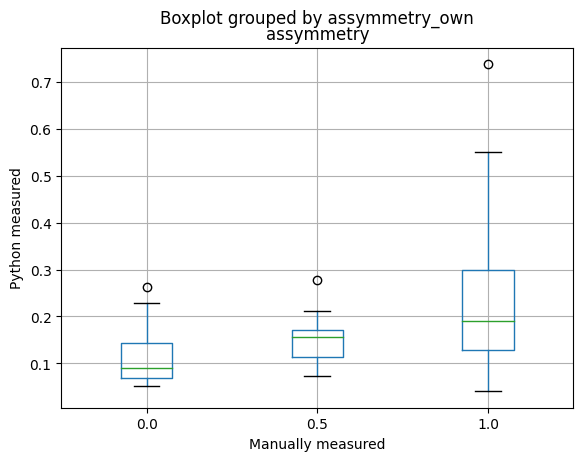

In [7]:
import matplotlib.pyplot as plt
df_concated.boxplot(column='assymmetry', by='assymmetry_own')

# Set labels and title
plt.xlabel('Manually measured')
plt.ylabel('Python measured')

# Show the plot
plt.show()

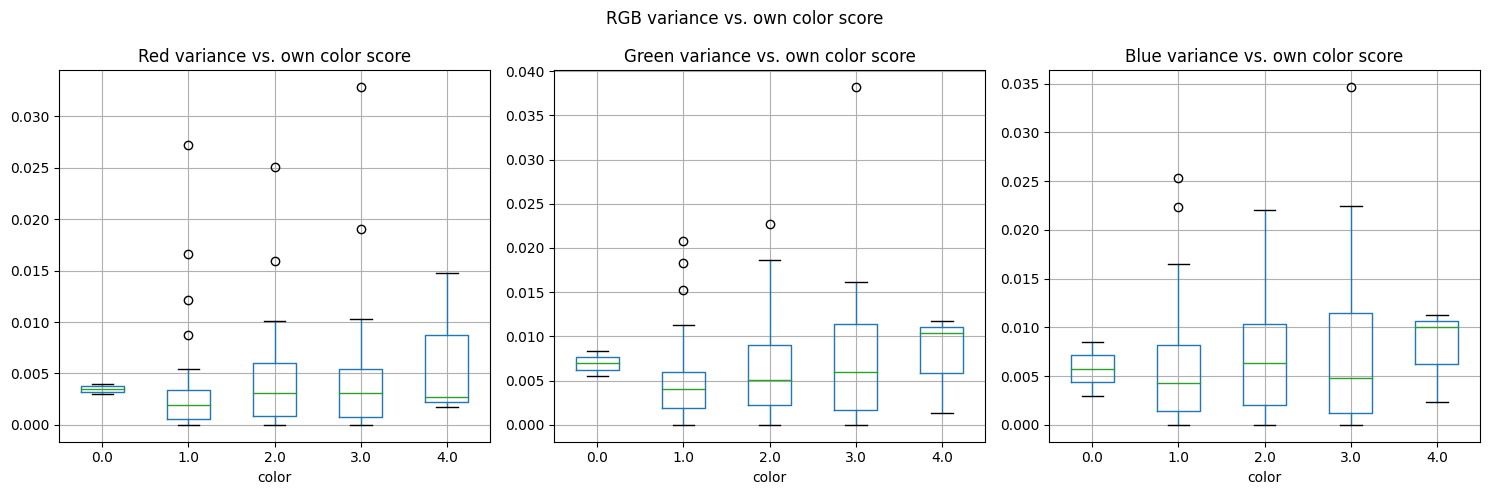

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df_concated.boxplot(column='red_var', by='color', ax = axes[0])
df_concated.boxplot(column='green_var', by='color', ax = axes[1])
df_concated.boxplot(column='blue_var', by='color', ax = axes[2])

axes[0].set_title('Red variance vs. own color score')
axes[1].set_title('Green variance vs. own color score')
axes[2].set_title('Blue variance vs. own color score')

fig.suptitle('RGB variance vs. own color score')
# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
#Creating new csv for features.

df_own_features_sorted.to_csv("feature_data_initial_images.csv", index= False)